In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 15, 6
#plt.style.use('seaborn')
import glob
from scipy.interpolate import interp1d
import lmfit as lm
import scipy.io

In [2]:
lvl_list = glob.glob("Cravings20Puff/*_lvl.*")
time_list = glob.glob("Cravings20Puff/*_time.*")
session_list = [file.split('/')[-1].split(".")[0].split("_")[0] for file in lvl_list]
session_list

['10-Session-002',
 '15-Session-002',
 '17-Session-002',
 '19-Session-002',
 '21-Session-002',
 '23-Session-001',
 '24-Session-001',
 '25-Session-001',
 '26-Session-002',
 '28-Session-001',
 '29-Session-001',
 '3-Session-004',
 '5-Session-002',
 '7-Session-002',
 '9-Session-002']

In [3]:
puffs = np.arange(110,2500,120)
puffs.size

20

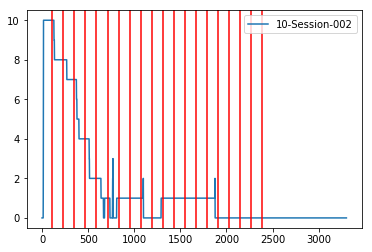

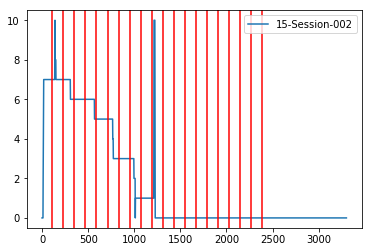

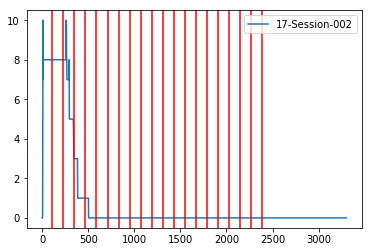

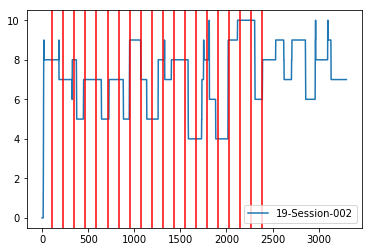

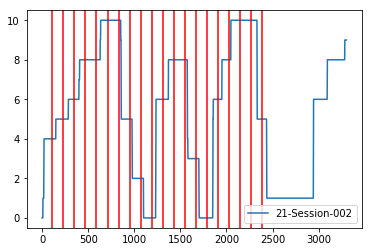

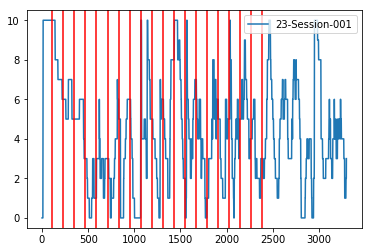

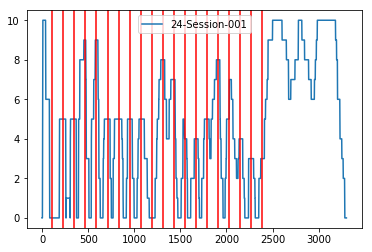

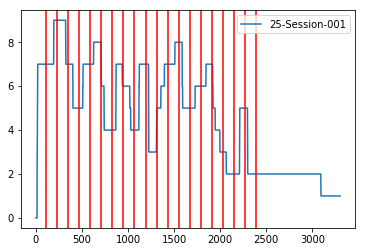

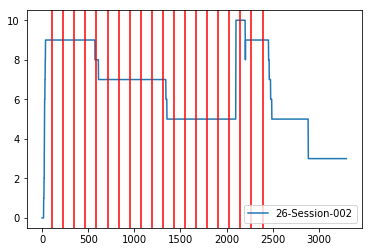

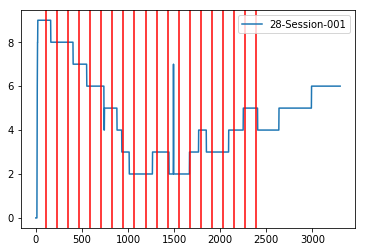

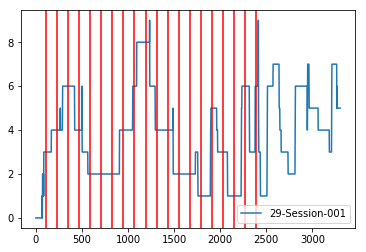

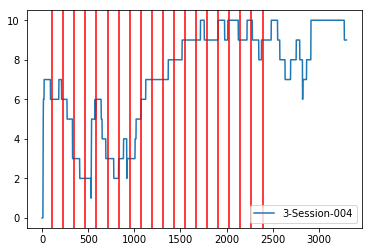

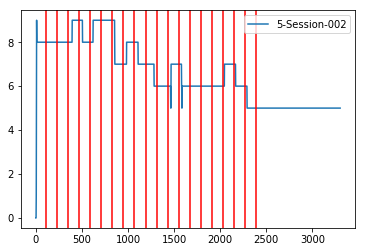

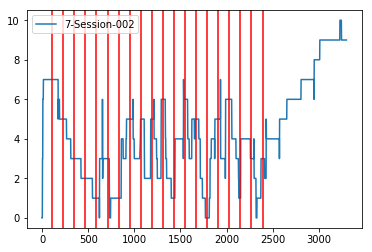

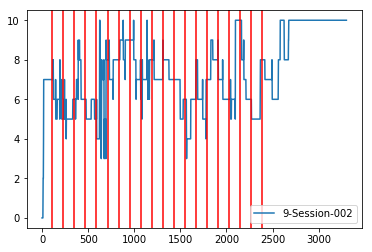

In [4]:
cravings_all = None
cravings_t_all = np.linspace(110,2510,240,endpoint=True)
for lvl,time,session in zip(lvl_list,time_list,session_list):
    cravings = np.load(lvl)
    cravings_t = np.load(time)
    if cravings_all is None:
        cravings_all = interp1d(cravings_t,cravings)(cravings_t_all)*10
    else:
        cravings_all = np.vstack((cravings_all,interp1d(cravings_t,cravings)(cravings_t_all)*10))       
    plt.figure()
    plt.plot(cravings_t,cravings,label=session)
    for p in puffs:
        plt.axvline(x=p,color="r")
    plt.legend()

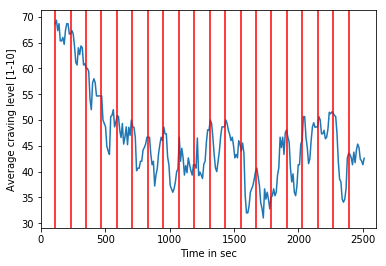

In [5]:
plt.plot(cravings_t_all,np.mean(cravings_all,axis=0))
for p in puffs:
    plt.axvline(x=p,color="r")
plt.xlim((0,2600))
plt.xlabel("Time in sec")
plt.ylabel("Average craving level [1-10]")
plt.savefig("cravings.pdf")

In [6]:
cravings_mean = np.mean(cravings_all,axis=0)

In [7]:
def expon(t,offset,amplitude,tau):
    return offset+amplitude*np.exp(-t/tau)

In [8]:
expon_model = lm.Model(expon)
pars = expon_model.make_params()

In [9]:
pars['offset'].set(value=4.0,vary=True)
pars['amplitude'].set(value=3,vary=True)
pars['tau'].set(value=300,vary=True)

In [10]:
out = expon_model.fit(cravings_all, pars, t=cravings_t_all-110)
print(out.fit_report(min_correl=0.25))

[[Model]]
    Model(expon)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 3600
    # variables        = 3
    chi-square         = 3084960.43
    reduced chi-square = 857.648159
    Akaike info crit   = 24318.0969
    Bayesian info crit = 24336.6630
[[Variables]]
    offset:     42.0987482 +/- 0.69747319 (1.66%) (init = 4)
    amplitude:  31.9610674 +/- 2.63786463 (8.25%) (init = 3)
    tau:        309.199879 +/- 45.2649503 (14.64%) (init = 300)
[[Correlations]] (unreported correlations are < 0.250)
    C(offset, tau)    = -0.584
    C(amplitude, tau) = -0.553



In [11]:
cravings_mean, cravings_t_all


(array([68.66666667, 69.33333333, 67.33333333, 68.66666667, 65.33333333,
        65.33333333, 66.        , 64.66666667, 67.33333333, 68.66666667,
        68.65121083, 66.66666667, 66.66666667, 67.33333333, 66.66666667,
        64.30192071, 61.16278726, 60.66666667, 64.        , 62.66666667,
        64.36114803, 64.        , 60.66666667, 60.92516325, 60.        ,
        60.        , 59.37976102, 54.        , 52.00547504, 57.21040133,
        58.        , 57.22313427, 54.66666667, 54.66666667, 54.67078335,
        54.66666667, 54.66666667, 50.        , 49.33333333, 48.68475932,
        44.91025657, 44.        , 43.33333333, 50.66666667, 50.89737969,
        52.        , 48.66666667, 49.61081782, 50.85903946, 50.66666667,
        48.        , 46.60335093, 49.33333333, 45.3332099 , 46.66666667,
        48.66666667, 45.21501519, 48.58666754, 47.0224694 , 50.        ,
        48.66666667, 48.58597073, 46.66666667, 40.1766403 , 40.66666667,
        40.66666667, 42.        , 42.        , 44.1

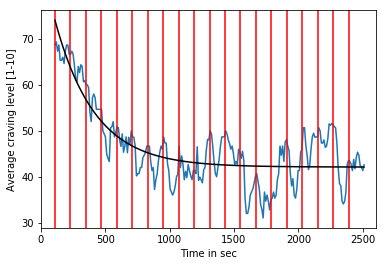

In [12]:
plt.plot(cravings_t_all,np.mean(cravings_all,axis=0))
for p in puffs:
    plt.axvline(x=p,color="r")
plt.xlim((0,2600))
plt.xlabel("Time in sec")
plt.ylabel("Average craving level [1-10]")
plt.plot(cravings_t_all, out.best_fit, 'k-')
plt.savefig("cravings_fit.pdf")

In [13]:
puff10=pd.read_csv("10Puff.csv",index_col=0)
puff20=pd.read_csv("20Puff.csv",index_col=0)

In [14]:
puff10

,3-003,5-001,6-001,7-001,11-001 (9 ARUP),12-001 (10 ARUP),13-001,17-001 (15 ARUP),18-001 (16 ARUP),17-001,18-001
Baseline,2,1,8,2,2,5,3,1,1,1,1
2,2,1,7,5,4,4,1,1,1,2,1
4,1,2,9,6,8,7,4,4,1,3,3
6,4,3,7,6,9,11,5,6,1,4,3
8,1,4,6,8,9,13,6,NaN,3,7,6
10,3,7,8,9,12,15,7,9,4,NaN,6
EOS,1,5,9,8,10,13,7,5,NaN,7,6
Cotinine(BL),151,124,59,29,280,354,159,73,30,134,39
FagerStrom,6,7,7,6,7,7,8,7,6,6,6
Cig/Day,11_20,11_20,0_10,0_10,0_10,11_20,11_20,11_20,0_10,11_20,0_10


In [15]:
puff20

,3-004,5-002,7-002,11-002(9 ARUP),17-002,17-002(15ARUP) listed as 14-002?,19-002,26-002,12-002 (10-002 ARUP),24-001,25-001,28-001,23-001,29-001,32-001(no cravings),33-001(no cravings),21-002
Baseline,2,1,1,4,1,1,8,4,6,7,4,3,4,14,13,9,4
4,4,4,6,7,5,3,14,5,6,8,5,4,6,11,12,10,3
8,7,4,9,11,8,7,15,8,10,9,7,11,7,13,20,17,7
12,6,8,12,13,11,10,20,12,13,12,9,9,15,14,19,16,10
16,10,13,17,15,13,12,23,15,16,18,14,12,11,12,21,25,13
20,12,16,12,16,14,14,22,18,18,19,15,14,12,11,20,21,14
EOS,11,10,10,13,9,9,22,18,17,16,15,12,13,16,23,16,13
Cotinine(BL),229,52,19,240,125,169,106,256,306,233,137,63,251,185,202,162,28
FagerStrom,6,7,6,7,6,7,6,8,7,8,7,6,6,7,6,6,6
Cig/Day,11_20,11_20,0_10,0_10,11_20,11_20,11_20,20_30,11_20,20_30,11_20,11_20,11_20,11_20,20_30,11_20,"0_10,11_20,0_10"


In [16]:
puff10t = puff10.transpose()
puff10t

,Baseline,2,4,6,8,10,EOS,Cotinine(BL),FagerStrom,Cig/Day,Gender,Age,Weight (lb),"Height ("")"
3-003,2,2,1,4,1,3,1,151,6,11_20,F,44,137,67
5-001,1,1,2,3,4,7,5,124,7,11_20,M,26,155,69.5
6-001,8,7,9,7,6,8,9,59,7,0_10,M,22,165,70
7-001,2,5,6,6,8,9,8,29,6,0_10,M,23,174,68
11-001 (9 ARUP),2,4,8,9,9,12,10,280,7,0_10,M,29,260,73
12-001 (10 ARUP),5,4,7,11,13,15,13,354,7,11_20,F,25,130,64
13-001,3,1,4,5,6,7,7,159,8,11_20,M,37,206,72
17-001 (15 ARUP),1,1,4,6,NaN,9,5,73,7,11_20,M,40,230,69
18-001 (16 ARUP),1,1,1,1,3,4,NaN,30,6,0_10,M,22,135,70
17-001,1,2,3,4,7,NaN,7,134,6,11_20,M,38,175,69


In [17]:
puff20t = puff20.transpose()
puff20t

,Baseline,4,8,12,16,20,EOS,Cotinine(BL),FagerStrom,Cig/Day,Gender,Age,Weight (lb),"Height ("")"
3-004,2,4,7,6,10,12,11,229,6,11_20,F,44,137,67
5-002,1,4,4,8,13,16,10,52,7,11_20,M,26,155,69.5
7-002,1,6,9,12,17,12,10,19,6,0_10,M,23,174,68
11-002(9 ARUP),4,7,11,13,15,16,13,240,7,0_10,M,29,260,73
17-002,1,5,8,11,13,14,9,125,6,11_20,M,38,175,69
17-002(15ARUP) listed as 14-002?,1,3,7,10,12,14,9,169,7,11_20,M,40,230,69
19-002,8,14,15,20,23,22,22,106,6,11_20,M,24,155,67
26-002,4,5,8,12,15,18,18,256,8,20_30,M,26,125,64
12-002 (10-002 ARUP),6,6,10,13,16,18,17,306,7,11_20,F,25,130,64
24-001,7,8,9,12,18,19,16,233,8,20_30,F,52,182,67


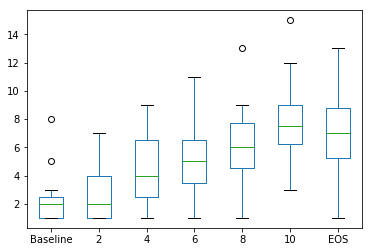

In [18]:
plot_x_10 = ["Baseline","2","4","6","8","10","EOS"]
num_columns = ['Age','Weight (lb)','Height (")']
puff10t[plot_x_10]=puff10t[plot_x_10].apply(pd.to_numeric)
puff10t[num_columns]=puff10t[num_columns].apply(pd.to_numeric)
# create new column "offset" and set value to zero if value is 1 (one could mean anything below 2)
puff10t["offset"]=puff10t["Baseline"]
puff10t.loc[puff10t["offset"]==1,"offset"]=0
puff10t[plot_x_10].plot(kind='box')

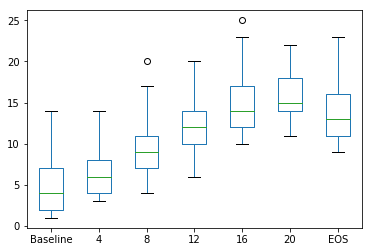

In [19]:
plot_x_20 = ["Baseline","4","8","12","16","20","EOS"]
num_columns = ['Age','Weight (lb)','Height (")']
puff20t[plot_x_20]=puff20t[plot_x_20].apply(pd.to_numeric)
puff20t[num_columns]=puff20t[num_columns].apply(pd.to_numeric)
# create new column "offset" and set value to zero if value is 1 (one could mean anything below 2)
puff20t["offset"]=puff20t["Baseline"]
puff20t.loc[puff20t["offset"]==1,"offset"]=0
puff20t[plot_x_20].plot(kind='box')

In [20]:
puff1020t = puff10t.append(puff20t)
puff1020t

/Users/hstrey/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,10,12,16,2,20,4,6,8,Age,Baseline,Cig/Day,Cotinine(BL),EOS,FagerStrom,Gender,"Height ("")",Weight (lb),offset
3-003,3.0,NaN,NaN,2.0,NaN,1,4.0,1.0,44,2,11_20,151,1.0,6,F,67.0,137.0,2
5-001,7.0,NaN,NaN,1.0,NaN,2,3.0,4.0,26,1,11_20,124,5.0,7,M,69.5,155.0,0
6-001,8.0,NaN,NaN,7.0,NaN,9,7.0,6.0,22,8,0_10,59,9.0,7,M,70.0,165.0,8
7-001,9.0,NaN,NaN,5.0,NaN,6,6.0,8.0,23,2,0_10,29,8.0,6,M,68.0,174.0,2
11-001 (9 ARUP),12.0,NaN,NaN,4.0,NaN,8,9.0,9.0,29,2,0_10,280,10.0,7,M,73.0,260.0,2
12-001 (10 ARUP),15.0,NaN,NaN,4.0,NaN,7,11.0,13.0,25,5,11_20,354,13.0,7,F,64.0,130.0,5
13-001,7.0,NaN,NaN,1.0,NaN,4,5.0,6.0,37,3,11_20,159,7.0,8,M,72.0,206.0,3
17-001 (15 ARUP),9.0,NaN,NaN,1.0,NaN,4,6.0,NaN,40,1,11_20,73,5.0,7,M,69.0,230.0,0
18-001 (16 ARUP),4.0,NaN,NaN,1.0,NaN,1,1.0,3.0,22,1,0_10,30,NaN,6,M,70.0,135.0,0
17-001,NaN,NaN,NaN,2.0,NaN,3,4.0,7.0,38,1,11_20,134,7.0,6,M,69.0,175.0,0


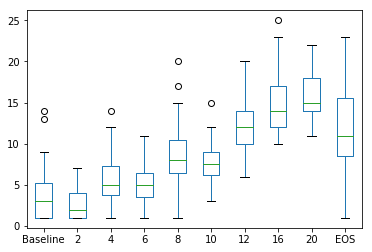

In [21]:
plot_x_1020 = ["Baseline","2","4","6","8","10","12","16","20","EOS"]
#num_columns = ['Age','Weight (lb)','Height (")']
#puff1020t[plot_x_1020]=puff1020t[plot_x_20].apply(pd.to_numeric)
#puff20t[num_columns]=puff20t[num_columns].apply(pd.to_numeric)
# create new column "offset" and set value to zero if value is 1 (one could mean anything below 2)
#puff20t["offset"]=puff20t["Baseline"]
#puff20t.loc[puff20t["offset"]==1,"offset"]=0
puff1020t[plot_x_1020].plot(kind='box')

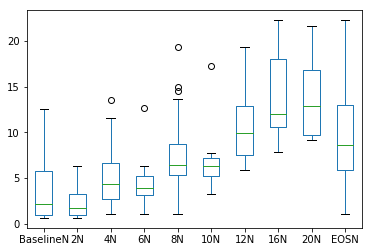

In [22]:
# create body weight normalized nicotine concentrations
plot_x_1020_norm = ["BaselineN","2N","4N","6N","8N","10N","12N","16N","20N","EOSN"]
puff1020t[plot_x_1020_norm]=puff1020t[plot_x_1020].divide(puff1020t['Weight (lb)'],axis=0)*150
puff1020t[plot_x_1020_norm].plot(kind='box')

In [23]:
nic_norm_mean=np.array(puff1020t[plot_x_1020_norm].mean())
nic_norm_std=np.array(puff1020t[plot_x_1020_norm].std())
puff_1020_norm=np.array([0,2,4,6,8,10,12,16,20])
p=np.polyfit(puff_1020_norm,nic_norm_mean[:-1],1)
print(p)
linefit = p[1]+puff_1020_norm*p[0]

[0.62369283 2.23277331]


Text(0,0.5,'normalized blood nicotine concentration ng/ml')

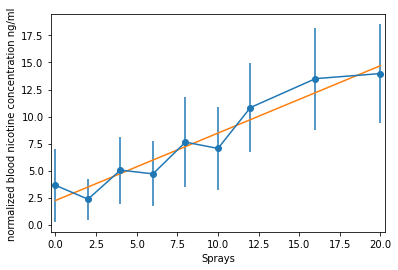

In [24]:
plt.errorbar(puff_1020_norm,nic_norm_mean[:-1],yerr=nic_norm_std[:-1], marker='o')
plt.plot(puff_1020_norm,linefit)
plt.xlim((-0.3,20.3))
plt.xlabel('Sprays')
plt.ylabel('normalized blood nicotine concentration ng/ml')

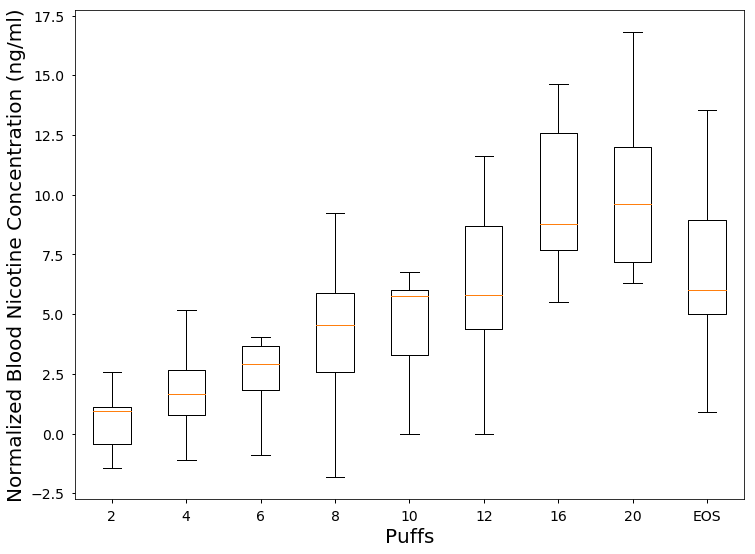

In [25]:
# try something different.  First subtract the offset and then normalize
plt.style.use('seaborn-notebook')
plt.figure(figsize=(12,9))
plot_x_1020_norm_offset = ["BaselineON","2ON","4ON","6ON","8ON","10ON","12ON","16ON","20ON","EOSON"]
puff1020t[plot_x_1020_norm_offset]=puff1020t[plot_x_1020].subtract(puff1020t["offset"],axis=0).divide(puff1020t['Weight (lb)'],axis=0)*150
plot_data = np.array(puff1020t[plot_x_1020_norm_offset[1:]])
data = [x[~np.isnan(x)] for x in plot_data.T]
plt.boxplot(data,labels=["2","4","6","8","10","12","16","20","EOS"],showfliers=False)
plt.xlabel('Puffs',fontsize=20)
plt.ylabel('Normalized Blood Nicotine Concentration (ng/ml)', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("rajat.svg",format='svg')

In [26]:
data

[array([ 0.        ,  0.96774194, -0.90909091,  2.5862069 ,  1.15384615,
        -1.15384615, -1.45631068,  0.65217391,  1.11111111,  1.71428571,
         0.96153846]),
 array([-1.09489051,  1.93548387,  0.90909091,  3.44827586,  3.46153846,
         2.30769231,  0.72815534,  2.60869565,  1.11111111,  2.57142857,
         2.88461538,  2.18978102,  3.87096774,  5.17241379,  1.73076923,
         4.28571429,  1.95652174,  5.80645161,  1.2       ,  0.        ,
         0.82417582,  0.76923077,  0.65217391,  1.57894737, -2.64705882,
        -0.96774194,  0.80213904, -0.92307692]),
 array([ 2.18978102,  2.90322581, -0.90909091,  3.44827586,  4.03846154,
         6.92307692,  1.45631068,  3.91304348,  1.11111111,  3.42857143,
         2.88461538]),
 array([-1.09489051,  3.87096774, -1.81818182,  5.17241379,  4.03846154,
         9.23076923,  2.18446602,  3.33333333,  6.        ,  5.76923077,
         5.47445255,  3.87096774,  7.75862069,  4.03846154,  6.85714286,
         4.56521739,  6.77419

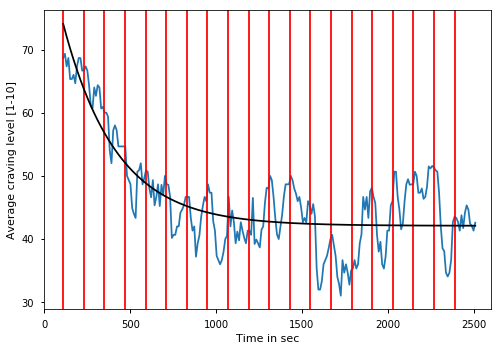

In [27]:
plt.plot(cravings_t_all,np.mean(cravings_all,axis=0))
for p in puffs:
    plt.axvline(x=p,color="r")
plt.xlim((0,2600))
plt.xlabel("Time in sec")
plt.ylabel("Average craving level [1-10]")
plt.plot(cravings_t_all, out.best_fit, 'k-')
plt.savefig("cravings_fit.pdf")

In [28]:
print(puffs)
print(puffs.shape)
print(len(data))
puffs_boxplot = np.array([4,8,12,16,20,24,32,40])*60+50
print(puffs_boxplot)
linefit

[ 110  230  350  470  590  710  830  950 1070 1190 1310 1430 1550 1670
 1790 1910 2030 2150 2270 2390]
(20,)
9
[ 290  530  770 1010 1250 1490 1970 2450]


array([ 2.23277331,  3.48015898,  4.72754464,  5.9749303 ,  7.22231597,
        8.46970163,  9.71708729, 12.21185862, 14.70662994])

In [29]:
puffs_boxplot_intercept = [110,290,530,770,1010,1250,1490,1970,2450]

In [30]:
nic_norm_offset_mean=np.array(puff1020t[plot_x_1020_norm_offset].mean())
nic_norm_offset_std=np.array(puff1020t[plot_x_1020_norm_offset].std())
puff_norm_offset=np.array([2,4,6,8,10,12,16,20])
p2=np.polyfit(puffs_boxplot,nic_norm_offset_mean[1:-1],1)
print(p2)
linefit = p2[1]+np.array(puffs_boxplot_intercept)*p2[0]

[ 0.00450674 -0.55803398]


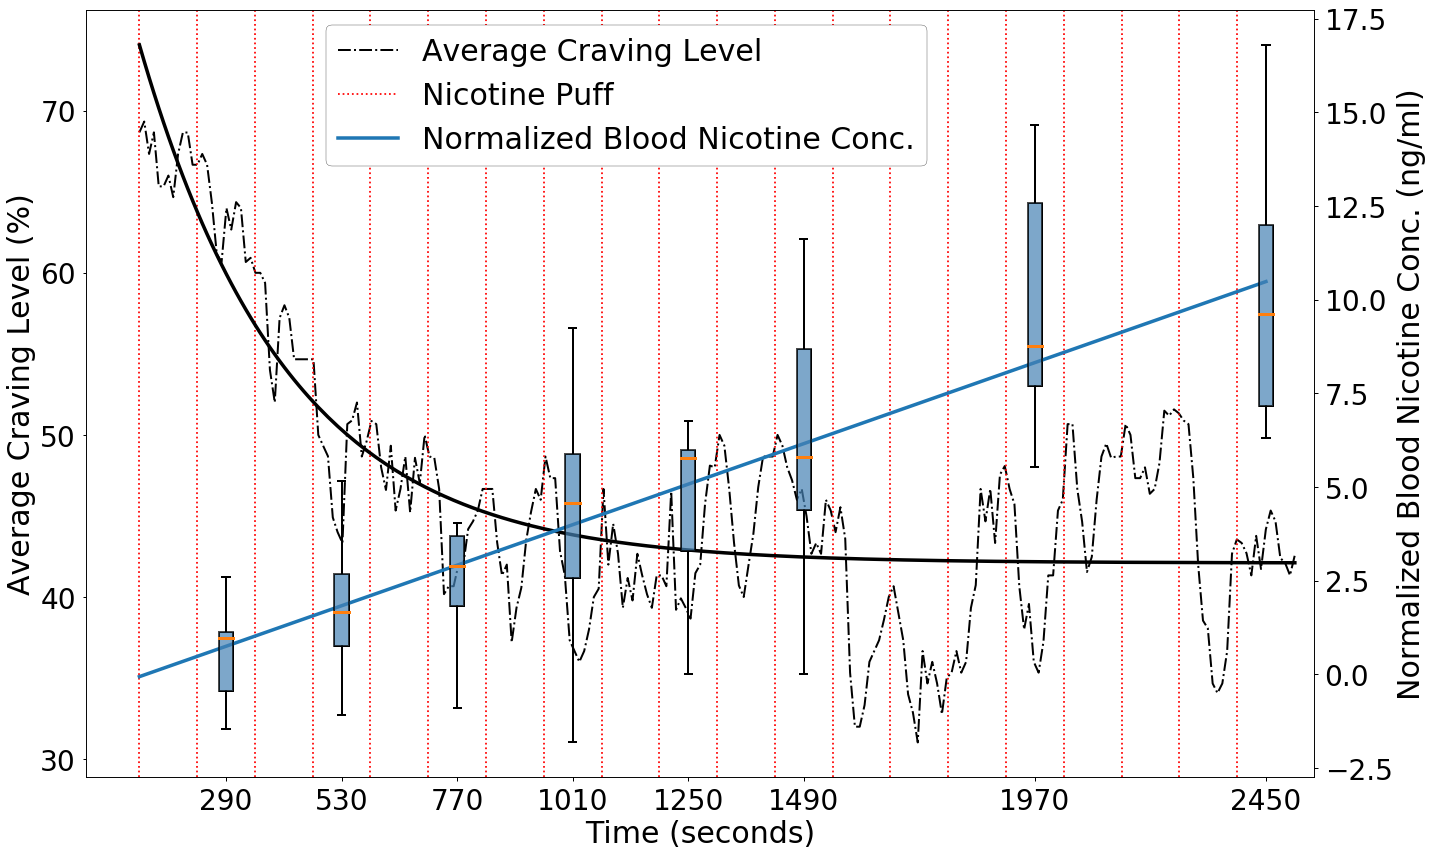

In [39]:
# plt.style.use('seaborn-notebook')
# plt.figure(figsize=(12,9))
# fig, ax1 = plt.subplots()

# ax1.set_xlabel('Time in Seconds')
# ax1.set_ylabel('Average Craving Level [1-10]', color=color)
# ax1.plot(t, data1, color=color)
# ax1.tick_params(axis='y', labelcolor=color)

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()

my_labels = {"x1" : "Nicotine Puff"}
#plt.style.use('bmh')

fig, ax1 = plt.subplots(figsize=(20,12))
ax1.set_xlabel('Time (seconds)',fontsize=30)
ax1.set_ylabel('Average Craving Level (%)',fontsize=30)
ax1.plot(cravings_t_all,np.mean(cravings_all,axis=0),'k-',linestyle='-.',linewidth=2,label = 'Average Craving Level')
for p in puffs:
    plt.axvline(x=p,color="r",linestyle=':',label = my_labels["x1"])
    my_labels["x1"] = "_nolegend_"
ax1.plot(cravings_t_all, out.best_fit, 'k-', linewidth= 3.5)
#ax1.legend(fontsize=30,loc=9, bbox_to_anchor=(0.86, 1.16))

ax2 = ax1.twinx()

ax2.set_ylabel('Normalized Blood Nicotine Conc. (ng/ml)', fontsize=30)

ax2.boxplot(data[:-1],
            positions=puffs_boxplot,
            widths=30,
            patch_artist=True,
            boxprops=dict(facecolor="steelblue",linewidth=2,alpha=.7),
            whiskerprops=dict(linewidth=2),
            medianprops=dict(linewidth=3),
            capprops=dict(linewidth=2),
            showfliers=False)
ax2.boxplot(data[:-1],positions=puffs_boxplot,widths=30,showfliers=False)

plt.xlim(0,2550)

ax1.tick_params(axis='both',labelsize=28)
ax2.tick_params(axis='both',labelsize=28)
ax2.plot(puffs_boxplot_intercept,linefit,linewidth=3.5, label ='Normalized Blood Nicotine Conc.')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
#ax1.legend(h1+h2, l1+l2,loc=9, bbox_to_anchor=(0.768, 1.24),fontsize=30)
ax1.legend(h1+h2, l1+l2,loc=9, bbox_to_anchor=(0.44, 1.0),fontsize=30,framealpha=1,frameon=True,edgecolor="k")
fig.tight_layout()
plt.savefig("cravings_fit.pdf")
plt.show()